### Importing Libraries for Numerical Calculations and Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Keras and Its Required Functions

In [2]:
# Set Parameters to Theano Type
from keras import backend as K
K.set_image_dim_ordering('th')

# Model Type and Layers and Other Requirements
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import keras.callbacks as callbacks

Using TensorFlow backend.


### Importing Data

If data is not downloaded on your system or you are using this data for the first time then it may take some time depending on your connection speed.

In [3]:
# Import MNIST Dataset
from keras.datasets import mnist

# Train Test Split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Exploratory Data Analysis

Shape of Training Data Before Reshape =  (60000, 28, 28)

Shape of Testing Data Before Reshape =  (10000, 28, 28)

Printing Example Image


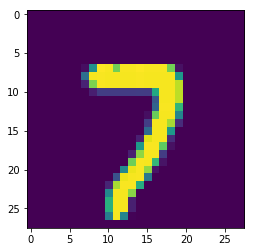

In [4]:
print('Shape of Training Data Before Reshape = ',X_train.shape)
print('\nShape of Testing Data Before Reshape = ',X_test.shape)

# Show Example Image
print('\nPrinting Example Image')
plt.imshow(X_train[4661])

### Preparing Data for Neural Network (Pre - Processing)

In [5]:
# Reshaping Data to only 1 Color Channel
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

print('Shape of Training Data After Reshape = ',X_train.shape)

# Normalizing Data to have range between 0 an 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('\nShape of Training Labels = ', y_train.shape)
print('\nStarting Ten Training Labels = ', y_train[:10])

# Reshaping Labels to Categorical Data
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print('\nShape of Training Labels After Converting them to Categorical = ', Y_train.shape)

Shape of Training Data After Reshape =  (60000, 1, 28, 28)

Shape of Training Labels =  (60000,)

Starting Ten Training Labels =  [5 0 4 1 9 2 1 3 1 4]

Shape of Training Labels After Converting them to Categorical =  (60000, 10)


In [9]:
X_train

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       ..., 
       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [

### Preparing Model

In [11]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation= 'relu', input_shape=(1,28,28)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

print('Compiling the Convolutional Neural Network \n')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('\nCurrent Model Output Shape', model.output_shape)

Compiling the Convolutional Neural Network 


Current Model Output Shape (None, 10)


### Training and Evaluating the Convolutional Neural Network

In [ ]:
print('Fitting Model to Training Data \n ')
model.fit(X_train, Y_train, epochs=10)

print('Evaluatng Trained Model on Test Data \n')
model.evaluate(X_test, Y_test)

# Saving Model

model.save('/home/braindead/Documents/MNIST_ConvNet_Model.h5')
model.save_weights('/home/braindead/Documents/MNIST_ConvNet_Weights.h5')